=== STUDENT DROPOUT PREDICTION SYSTEM (Reduced Features) ===
Focusing on Family and Resource Constraints
Dataset loaded successfully: (4424, 35)
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

=== DATA EXPLORATION ===
Dataset shape: (4424, 35)

Missing values:
0

Target distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Data types:
int64      29
float64     5
object      1
Name: count, dtype: int64

Basic statistics:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000     

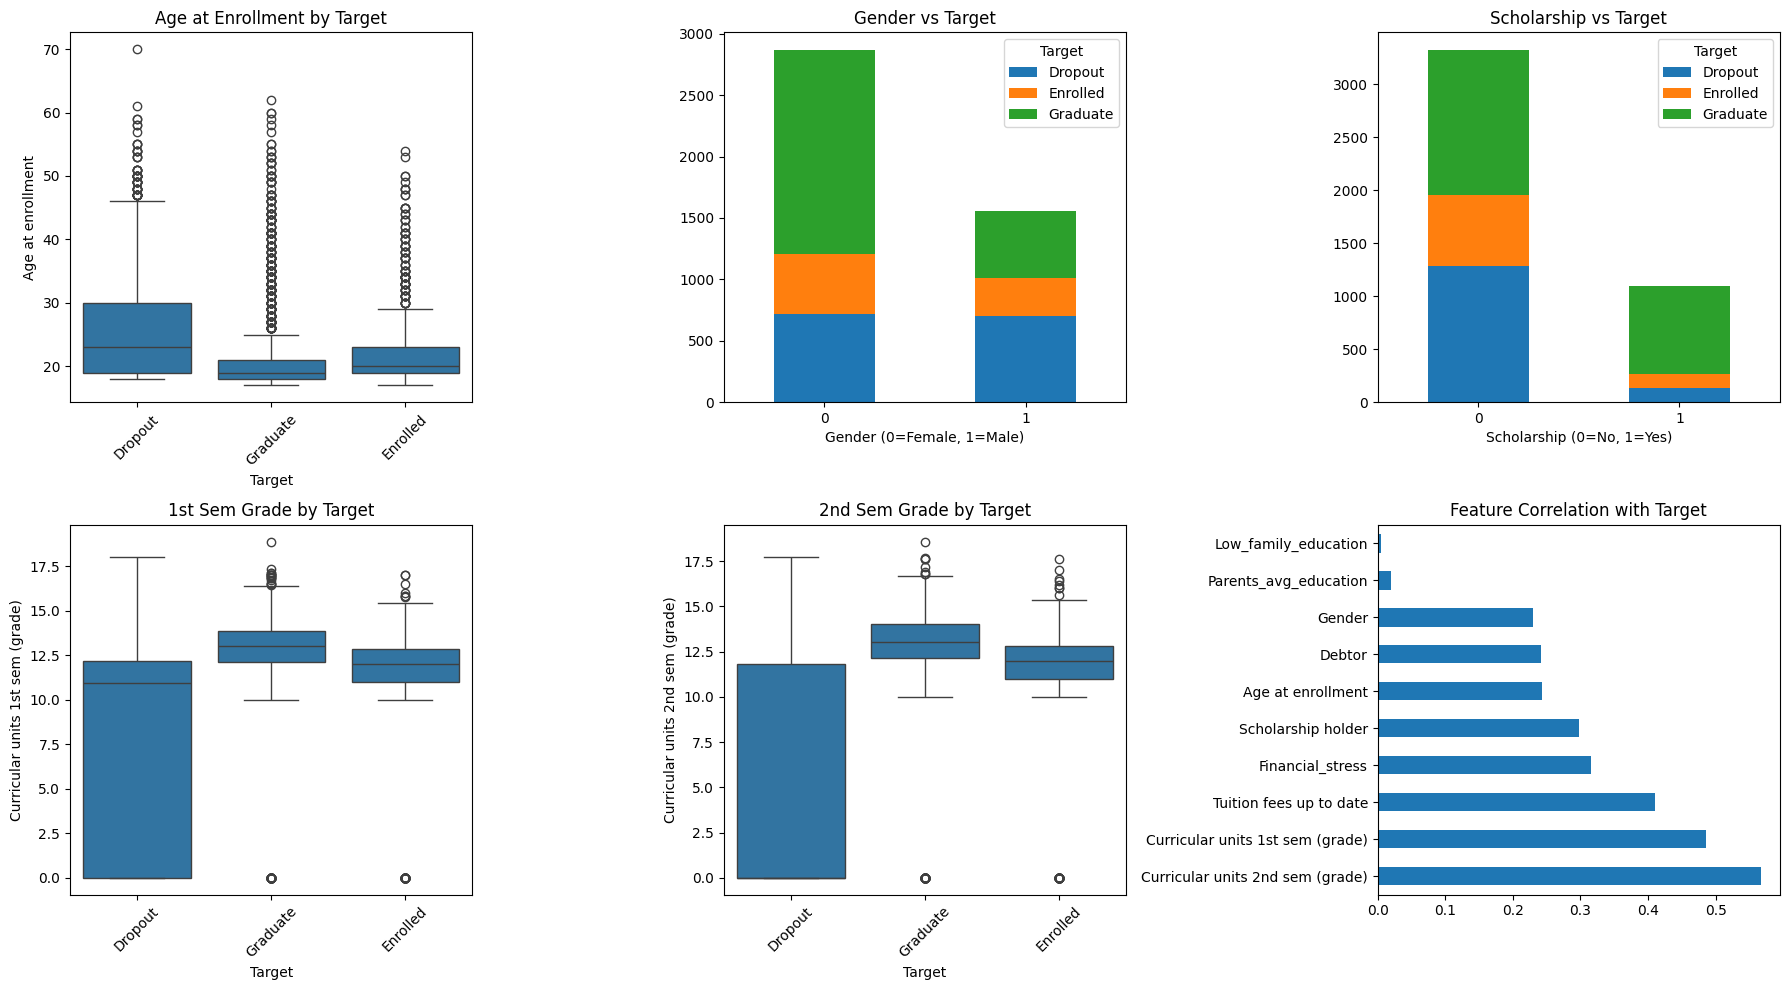

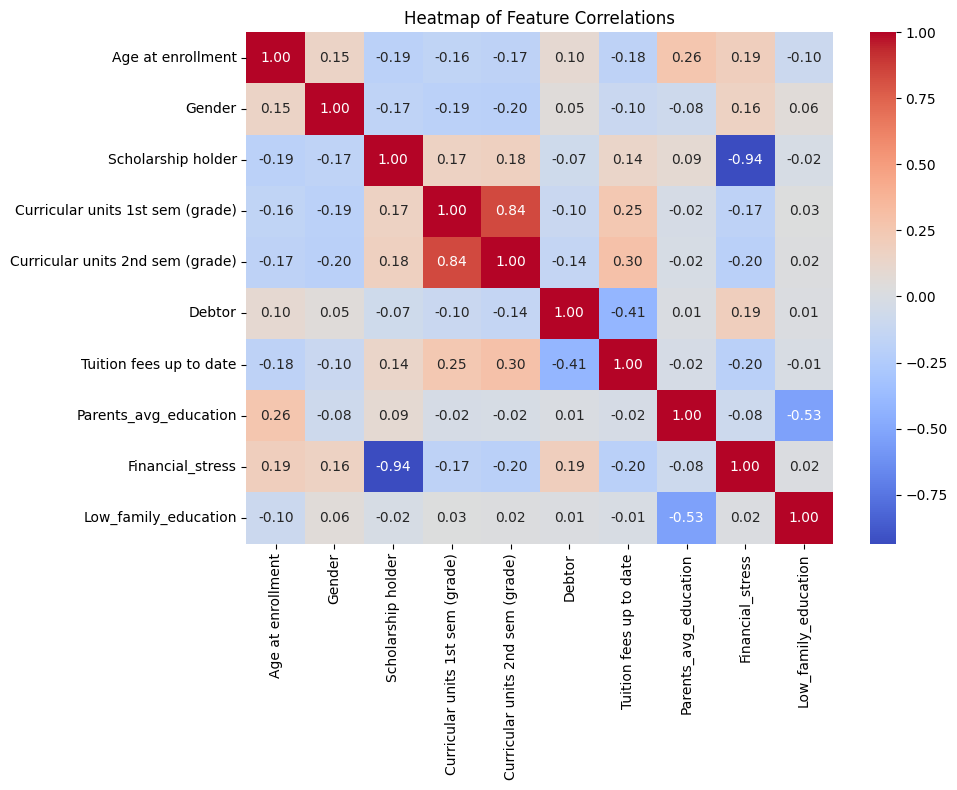


=== MODEL COMPARISON ===

Training Linear Regression (GD)...
Iteration 0, Train Loss: 2.194585
Iteration 100, Train Loss: 1.800180
Iteration 200, Train Loss: 1.509765
Iteration 300, Train Loss: 1.291003
Iteration 400, Train Loss: 1.123022
Iteration 500, Train Loss: 0.992001
Iteration 600, Train Loss: 0.888539
Iteration 700, Train Loss: 0.806056
Iteration 800, Train Loss: 0.739821
Iteration 900, Train Loss: 0.686342
Iteration 1000, Train Loss: 0.642987
Iteration 1100, Train Loss: 0.607732
Iteration 1200, Train Loss: 0.578997
Iteration 1300, Train Loss: 0.555534
Iteration 1400, Train Loss: 0.536350
Iteration 1500, Train Loss: 0.520647
Iteration 1600, Train Loss: 0.507779
Iteration 1700, Train Loss: 0.497227
Iteration 1800, Train Loss: 0.488565
Iteration 1900, Train Loss: 0.481449
Linear Regression (GD) Accuracy: 0.4588

Training Decision Tree...
Decision Tree Accuracy: 0.6746

Training Random Forest...
Random Forest Accuracy: 0.6554

=== DETAILED RESULTS ===

Linear Regression (GD) Clas

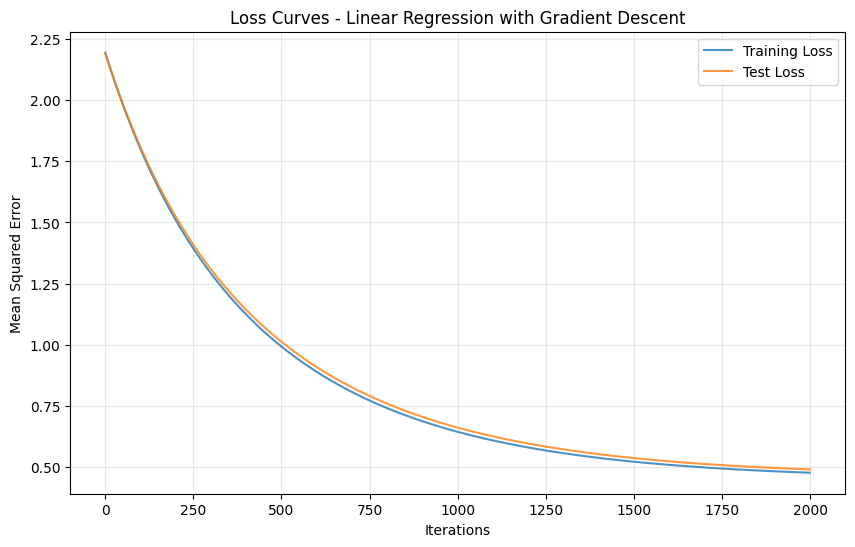

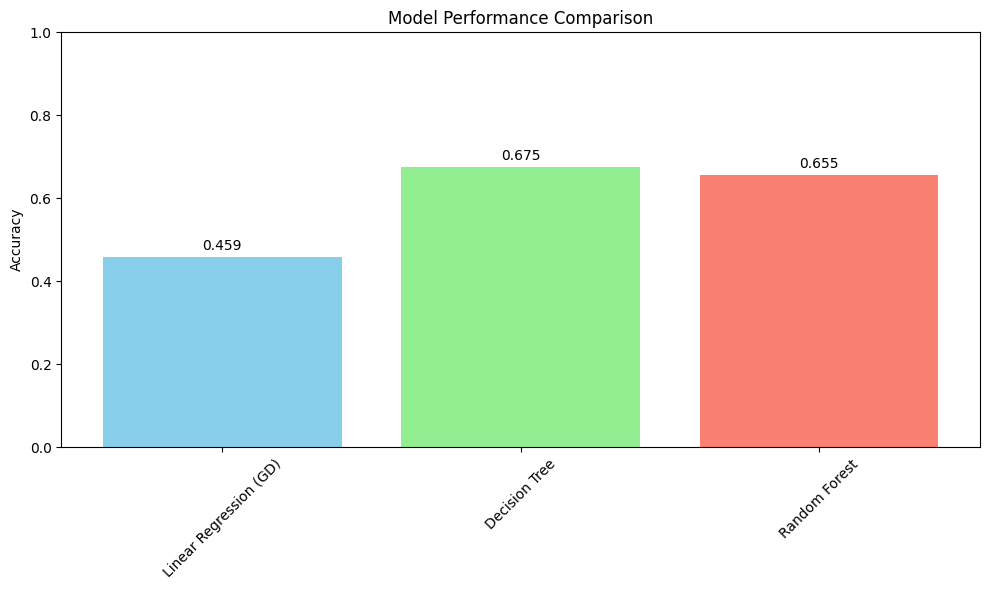

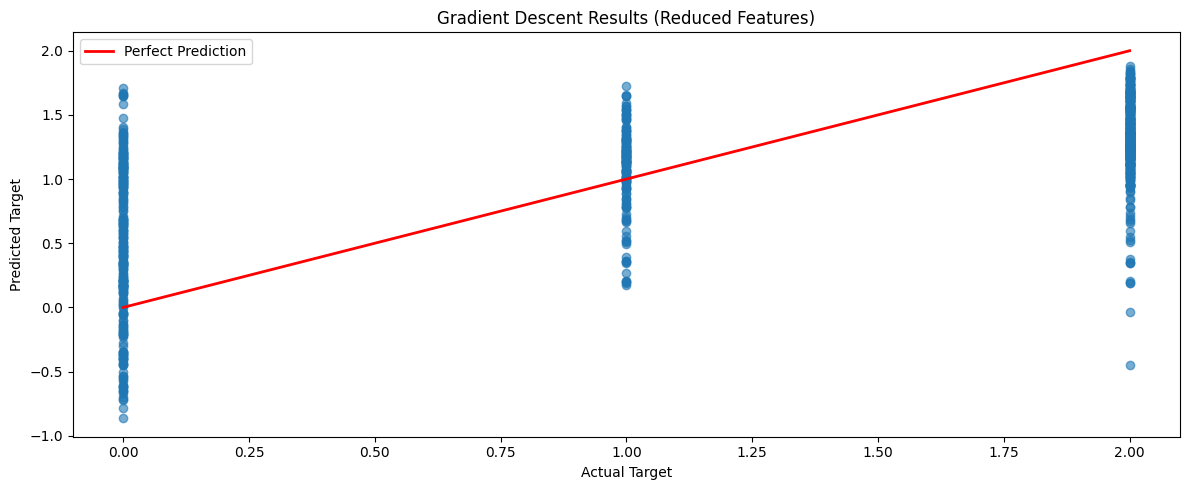


Best model (Decision Tree) saved to best_dropout_model.pkl
Best accuracy: 0.6746

=== PREDICTION EXAMPLE ===
Sample Student Prediction: Graduate
Actual Outcome: Graduate

System setup complete! Models saved and ready for deployment.


In [ ]:
"""
Student Dropout Prediction System
A comprehensive ML solution for predicting student dropout risk
using a selected subset of features for efficiency and interpretability.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# =========================
# Data Processing
# =========================

class DataProcessor:
    """Handle data loading, cleaning, and preprocessing"""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.feature_columns = None

    def load_data(self):
        """Load dataset from CSV file"""
        try:
            self.df = pd.read_csv(self.filepath)
            print(f"Dataset loaded successfully: {self.df.shape}")
            return self.df
        except Exception as e:
            print(f"Error loading data: {e}")
            return None

    def explore_data(self):
        """Perform initial data exploration"""
        if self.df is None:
            print("No data loaded. Call load_data() first.")
            return

        print("\n=== DATA EXPLORATION ===")
        print(f"Dataset shape: {self.df.shape}")
        print(f"\nMissing values:\n{self.df.isnull().sum().sum()}")
        print(f"\nTarget distribution:\n{self.df['Target'].value_counts()}")
        print(f"\nData types:\n{self.df.dtypes.value_counts()}")
        print(f"\nBasic statistics:")
        print(self.df.describe())
        return self.df.info()

    def visualize_data(self):
        """Create visualizations for selected features"""
        if self.df is None:
            print("No data loaded.")
            return

        plt.figure(figsize=(18, 10))
        # Age at enrollment by Target
        plt.subplot(2, 3, 1)
        sns.boxplot(data=self.df, x='Target', y='Age at enrollment')
        plt.title('Age at Enrollment by Target')
        plt.xticks(rotation=45)

        # Gender vs Target
        plt.subplot(2, 3, 2)
        gender_target = pd.crosstab(self.df['Gender'], self.df['Target'])
        gender_target.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Gender vs Target')
        plt.xlabel('Gender (0=Female, 1=Male)')
        plt.xticks(rotation=0)

        # Scholarship holder vs Target
        plt.subplot(2, 3, 3)
        scholarship_target = pd.crosstab(self.df['Scholarship holder'], self.df['Target'])
        scholarship_target.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Scholarship vs Target')
        plt.xlabel('Scholarship (0=No, 1=Yes)')
        plt.xticks(rotation=0)

        # 1st Semester Grade by Target
        plt.subplot(2, 3, 4)
        sns.boxplot(data=self.df, x='Target', y='Curricular units 1st sem (grade)')
        plt.title('1st Sem Grade by Target')
        plt.xticks(rotation=45)

        # 2nd Semester Grade by Target
        plt.subplot(2, 3, 5)
        sns.boxplot(data=self.df, x='Target', y='Curricular units 2nd sem (grade)')
        plt.title('2nd Sem Grade by Target')
        plt.xticks(rotation=45)

        # Feature correlations
        plt.subplot(2, 3, 6)
        df_temp = self.df.copy()
        df_temp['Target_encoded'] = self.label_encoder.fit_transform(df_temp['Target'])
        selected_features = [
            'Age at enrollment', 'Gender', 'Scholarship holder',
            'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
            'Debtor', 'Tuition fees up to date', 'Parents_avg_education',
            'Financial_stress', 'Low_family_education'
        ]
        
        missing = [f for f in selected_features if f not in df_temp.columns]
        if missing:
            print(f"Missing features for correlation plot: {missing}")
        else:
            corrs = df_temp[selected_features + ['Target_encoded']].corr()['Target_encoded'].abs().sort_values(ascending=False)[1:]
            corrs.plot(kind='barh')
            plt.title('Feature Correlation with Target')

        plt.tight_layout()
        plt.show()
        
        # Heatmap of feature correlations
        plt.figure(figsize=(10, 8))
        corr_matrix = self.df[selected_features].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Heatmap of Feature Correlations')
        plt.tight_layout()
        plt.show()
        # Histograms for feature distributions


    def feature_engineering(self):
        """Perform feature engineering and selection"""
        if self.df is None:
            print("No data loaded.")
            return None, None

        print("\n=== FEATURE ENGINEERING ===")
        df_processed = self.df.copy()

        # Parents_avg_education
        df_processed['Parents_avg_education'] = (
            df_processed["Mother's qualification"] + df_processed["Father's qualification"]
        ) / 2

        # Financial_stress
        df_processed['Financial_stress'] = (
            (df_processed['Debtor'] == 1) |
            (df_processed['Tuition fees up to date'] == 0) |
            (df_processed['Scholarship holder'] == 0)
        ).astype(int)

        # Low_family_education
        df_processed['Low_family_education'] = (
            (df_processed["Mother's qualification"] <= 2) &
            (df_processed["Father's qualification"] <= 2)
        ).astype(int)

        # Encode target variable
        df_processed['Target_encoded'] = self.label_encoder.fit_transform(df_processed['Target'])

        # Select reduced features
        feature_cols = [
            'Age at enrollment',
            'Gender',
            'Scholarship holder',
            'Curricular units 1st sem (grade)',
            'Curricular units 2nd sem (grade)',
            'Debtor',
            'Tuition fees up to date',
            'Parents_avg_education',
            'Financial_stress',
            'Low_family_education'
        ]
        X = df_processed[feature_cols]
        y = df_processed['Target_encoded']
        self.feature_columns = feature_cols

        # Update self.df so visualize_data uses the processed version
        self.df = df_processed

        print(f"Selected features: {feature_cols}")
        return X, y

    def standardize_data(self, X_train, X_test):
        """Standardize the features"""
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

# =========================
# Models
# =========================

class LinearRegressionGD:
    """Custom Linear Regression with Gradient Descent"""

    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.test_losses = []

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        n_samples, n_features = X_train.shape
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        prev_loss = float('inf')
        for i in range(self.max_iterations):
            y_pred_train = self._predict(X_train)
            train_loss = self._mse_loss(y_train, y_pred_train)
            self.train_losses.append(train_loss)
            if X_test is not None and y_test is not None:
                y_pred_test = self._predict(X_test)
                test_loss = self._mse_loss(y_test, y_pred_test)
                self.test_losses.append(test_loss)
            if abs(prev_loss - train_loss) < self.tolerance:
                print(f"Converged at iteration {i}")
                break
            prev_loss = train_loss
            dw, db = self._compute_gradients(X_train, y_train, y_pred_train)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            if i % 100 == 0:
                print(f"Iteration {i}, Train Loss: {train_loss:.6f}")

    def _predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def _mse_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def _compute_gradients(self, X, y_true, y_pred):
        n_samples = X.shape[0]
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y_true))
        db = (1/n_samples) * np.sum(y_pred - y_true)
        return dw, db

    def predict(self, X):
        return self._predict(X)

    def plot_loss_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_losses, label='Training Loss', alpha=0.8)
        if self.test_losses:
            plt.plot(self.test_losses, label='Test Loss', alpha=0.8)
        plt.title('Loss Curves - Linear Regression with Gradient Descent')
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

class ModelComparator:
    """Compare different machine learning models"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.best_model = None
        self.best_score = 0

    def add_model(self, name, model):
        self.models[name] = model

    def train_and_evaluate(self, X_train, y_train, X_test, y_test):
        print("\n=== MODEL COMPARISON ===")
        for name, model in self.models.items():
            print(f"\nTraining {name}...")
            if name == "Linear Regression (GD)":
                model.fit(X_train, y_train, X_test, y_test)
                y_pred = model.predict(X_test)
                y_pred_class = np.round(np.clip(y_pred, 0, 2)).astype(int)
            else:
                model.fit(X_train, y_train)
                y_pred_class = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred_class)
            self.results[name] = {
                'model': model,
                'accuracy': accuracy,
                'predictions': y_pred_class
            }
            print(f"{name} Accuracy: {accuracy:.4f}")
            if accuracy > self.best_score:
                self.best_score = accuracy
                self.best_model = model
                self.best_model_name = name
        print("\n=== DETAILED RESULTS ===")
        for name, result in self.results.items():
            print(f"\n{name} Classification Report:")
            print(classification_report(y_test, result['predictions']))

    def plot_model_comparison(self):
        names = list(self.results.keys())
        accuracies = [self.results[name]['accuracy'] for name in names]
        plt.figure(figsize=(10, 6))
        bars = plt.bar(names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
        plt.title('Model Performance Comparison')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        for bar, acc in zip(bars, accuracies):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                     f'{acc:.3f}', ha='center', va='bottom')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def save_best_model(self, filepath='best_model.pkl'):
        if self.best_model is None:
            print("No model has been trained yet.")
            return
        joblib.dump(self.best_model, filepath)
        print(f"\nBest model ({self.best_model_name}) saved to {filepath}")
        print(f"Best accuracy: {self.best_score:.4f}")

class Prediction:
    """Application for making predictions with the trained model"""

    def __init__(self, model_path='../best_dropout_model.pkl', scaler_path='../scaler.pkl'):
        self.model = joblib.load(model_path)
        self.scaler = joblib.load(scaler_path) if scaler_path else None

    def predict_single(self, features):
        if self.scaler:
            features_scaled = self.scaler.transform([features])
            prediction = self.model.predict(features_scaled)[0]
        else:
            prediction = self.model.predict([features])[0]
        class_names = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
        predicted_class = int(np.round(prediction))
        return class_names.get(predicted_class, 'Unknown')

    def predict_batch(self, df):
        if self.scaler:
            features_scaled = self.scaler.transform(df)
            predictions = self.model.predict(features_scaled)
        else:
            predictions = self.model.predict(df)
        class_names = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
        predicted_classes = [class_names.get(int(np.round(p)), 'Unknown') for p in predictions]
        return predicted_classes

# =========================
# Main Execution
# =========================

def main():
    print("=== STUDENT DROPOUT PREDICTION SYSTEM (Reduced Features) ===")
    print("Focusing on Family and Resource Constraints")

    # Initialize data processor
    processor = DataProcessor('cleaned_dataset.csv')

    # Load and explore data
    df = processor.load_data()
    print(df['Target'].value_counts())
    processor.explore_data()

    # Feature engineering (adds new columns)
    X, y = processor.feature_engineering()

    # Now visualize (the processed DataFrame has the new columns)
    processor.visualize_data()

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Standardize data
    X_train_scaled, X_test_scaled = processor.standardize_data(X_train, X_test)

    # Save scaler for later use
    joblib.dump(processor.scaler, 'scaler.pkl')

    # Initialize models
    comparator = ModelComparator()
    lr_gd = LinearRegressionGD(learning_rate=0.001, max_iterations=2000)
    comparator.add_model("Linear Regression (GD)", lr_gd)
    dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20)
    comparator.add_model("Decision Tree", dt)
    rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    class_weight='balanced')
    comparator.add_model("Random Forest", rf)
    comparator.add_model("Random Forest", rf)

    # Train and evaluate models
    comparator.train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test)

    # Plot loss curve for linear regression
    lr_gd.plot_loss_curve()

    # Plot model comparison
    comparator.plot_model_comparison()

    # Scatter plot for linear regression
    plt.figure(figsize=(12, 5))
    y_pred_gd = lr_gd.predict(X_test_scaled)
    plt.scatter(y_test, y_pred_gd, alpha=0.6)
    plt.plot([0, 2], [0, 2], color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title('Gradient Descent Results (Reduced Features)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Save best model
    comparator.save_best_model('best_dropout_model.pkl')

    print("\n=== PREDICTION EXAMPLE ===")
    app = Prediction('best_dropout_model.pkl', 'scaler.pkl')
    sample_features = X_test.iloc[0].values
    prediction = app.predict_single(sample_features)
    actual = ['Dropout', 'Enrolled', 'Graduate'][y_test.iloc[0]]
    print(f"Sample Student Prediction: {prediction}")
    print(f"Actual Outcome: {actual}")
    print("\nSystem setup complete! Models saved and ready for deployment.")

if __name__ == "__main__":
    main()